In [164]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import numpy as np

from PIL import Image



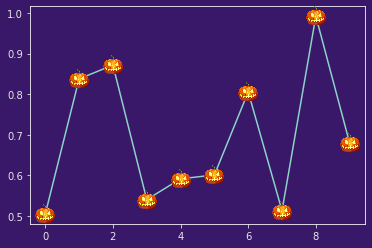

In [154]:
#Testing uploading pngs and using them as markers:

#image = Image.open('witch.png') #too dark, doesn't show against background
image = Image.open('jack.png')
image = image.resize((20, 20))
image = image.convert('RGBA')

image_ghost = Image.open('ghost.png')
image_ghost = image_ghost.resize((20, 20))
image_ghost = image_ghost.convert('RGBA')

#path = "https://upload.wikimedia.org/wikipedia/commons/b/b5/Tango-example_icons.png"
#image = plt.imread(path)[116:116+30, 236:236+30]
#print(image.size)
#print(image.shape)

x = np.arange(10)
y = np.random.rand(10)

fig, ax = plt.subplots()
ax.plot(x,y)

def plot_images(x, y, image, ax=None):
    ax = ax or plt.gca()

    for xi, yi in zip(x,y):
        im = OffsetImage(image, zoom=72/ax.figure.dpi)
        im.image.axes = ax

        ab = AnnotationBbox(im, (xi,yi), frameon=False, pad=0.0,)

        ax.add_artist(ab)

plot_images(x, y, image, ax=ax)

plt.show()
        

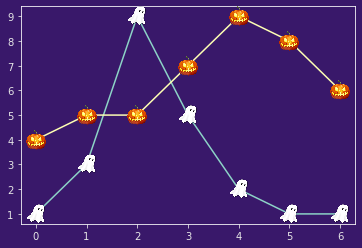

In [155]:
#Testing using a pandas dataframe for two different lines, each with their own custom marker

#print(df)
#print(df['B'])
#plt.plot(df['B'])
#print(df.index.values) #essentially the x values, which are from the pandas Dataframe auto indexing


df = pd.DataFrame({'Jack': [1, 3, 9, 5, 2, 1, 1],
                   'Casper': [4, 5, 5, 7, 9, 8, 6]})


fig, ax = plt.subplots()
ax.plot(df['Jack'])
ax.plot(df['Casper'])

#ax = ax or plt.gca()
    

for ji, ki in zip(df.index.values, df['Jack']):
        im = OffsetImage(image_ghost, zoom=72/ax.figure.dpi)
        im.image.axes = ax

        ab = AnnotationBbox(im, (ji,ki), frameon=False, pad=0.0,)

        ax.add_artist(ab)

for xi, yi in zip(df.index.values, df['Casper']):
        im = OffsetImage(image, zoom=72/ax.figure.dpi)
        im.image.axes = ax

        ab = AnnotationBbox(im, (xi,yi), frameon=False, pad=0.0,)

        ax.add_artist(ab)

plt.show()

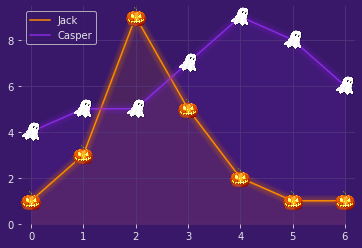

In [210]:
#Combining the custom marker effect with the reskinned cyberpunk glowing effects:


plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#39186A'  # dark purple

#colors = [
#    '#08F7FE',  # teal/cyan
#    '#FE53BB',  # pink
#    '#F5D300',  # yellow
#   '#00ff41',  # matrix green
#]
from matplotlib import colors

colors = [
    colors.to_rgb('darkorange'), #changes from matplotlib CSS color 'darkorange' to a hex code, readable by the rest of the code
    colors.to_rgb('blueviolet'),
#    '#F5D300',  # yellow - keeping from cyberpunk
#    colors.to_rgb('lime'),
]

df = pd.DataFrame({'Jack': [1, 3, 9, 5, 2, 1, 1],
                   'Casper': [4, 5, 5, 7, 9, 8, 6]})


fig, ax = plt.subplots()

#Get rid of border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)


df.plot(marker='o', color=colors, ax=ax)

#To get rid of legend border, above we removed Pandas auto legend, then below we recreate it and turn the frame off
#ax.legend()
#legend = ax.legend(frameon=False)


# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades

for n in range(1, n_shades+1):

    df.plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)

# Color the areas below the lines:
for column, color in zip(df, colors):
    ax.fill_between(x=df.index,
                    y1=df[column].values,
                    y2=[0] * len(df),
                    color=color,
                    alpha=0.1)
    


ax.grid(color='#52367C') #A lighter version of the background color

ax.set_xlim([ax.get_xlim()[0] - 0.2, ax.get_xlim()[1] + 0.2])  # to not have the markers cut off
ax.set_ylim(0)


for xi, yi in zip(df.index.values, df['Casper']):
        im = OffsetImage(image_ghost, zoom=72/ax.figure.dpi)
        im.image.axes = ax

        ab = AnnotationBbox(im, (xi,yi), frameon=False, pad=0.0,)

        ax.add_artist(ab)

for ji, ki in zip(df.index.values, df['Jack']):
        im = OffsetImage(image, zoom=72/ax.figure.dpi)
        im.image.axes = ax

        ab = AnnotationBbox(im, (ji,ki), frameon=False, pad=0.0,)

        ax.add_artist(ab)
        


plt.show()


#Comments/problems to do next:
    #There's still a light border around the plot and the legend I don't like and isn't in the cyberpunk code so I 
    #don't know how it got there
    
    #Grid color could be lighter
    
    #Maybe change background to black to have purple line color show up better?
    
    #Figure out how the cyberpunk color map and world map plots work
    
    #Figure out how to turn this into a downloadable package